In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam

In [2]:
df=pd.read_csv('updated_final_df.csv',infer_datetime_format=True,index_col='Date')

# Scaling the data

In [3]:
df_new=df.iloc[:,3]
df_new=np.array(df_new)


In [4]:
scaler=MinMaxScaler(feature_range=(-1,1))
scaled_data=scaler.fit_transform(df_new.reshape(-1,1))

In [5]:
scaled_data.shape

(5285, 1)

# Using TimeseriesGenerator for creating sequence

In [6]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Example time series data
#data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13])

# Create TimeSeriesGenerator object for x
x_generator = TimeseriesGenerator(scaled_data, scaled_data, length=4, stride=3)

# Generate x sequences
for i in range(len(x_generator)):
    x1, y1 = x_generator[i]
    print('x:', x1)
    print('y:', y1)
    



x: [[[-0.96679826]
  [-0.96491888]
  [-0.96291424]
  [-0.96318992]]

 [[-0.96318992]
  [-0.9602581 ]
  [-0.95827856]
  [-0.96429247]]

 [[-0.96429247]
  [-0.96499409]
  [-0.96326505]
  [-0.96925394]]

 [[-0.96925394]
  [-0.97719727]
  [-0.97674623]
  [-0.97303765]]

 [[-0.97303765]
  [-0.97431565]
  [-0.97642051]
  [-0.97684646]]

 [[-0.97684646]
  [-0.97140892]
  [-0.96993046]
  [-0.97180985]]

 [[-0.97180985]
  [-0.97451611]
  [-0.96702374]
  [-0.97281217]]

 [[-0.97281217]
  [-0.96619687]
  [-0.96697363]
  [-0.96805116]]

 [[-0.96805116]
  [-0.9700307 ]
  [-0.96907849]
  [-0.97306275]]

 [[-0.97306275]
  [-0.97030637]
  [-0.96942931]
  [-0.9662971 ]]

 [[-0.9662971 ]
  [-0.96013285]
  [-0.96053378]
  [-0.96203725]]

 [[-0.96203725]
  [-0.95923076]
  [-0.9602832 ]
  [-0.95852914]]

 [[-0.95852914]
  [-0.96213748]
  [-0.96329015]
  [-0.96278899]]

 [[-0.96278899]
  [-0.9590303 ]
  [-0.96181169]
  [-0.96318992]]

 [[-0.96318992]
  [-0.96116018]
  [-0.95700056]
  [-0.95815323]]

 [[-0.9

In [7]:
print(x1.shape)
print(y1.shape)

(97, 4, 1)
(97, 1)


# splitting the data in training and test sets and validation set


In [12]:
training_size=round(len(x1)*0.7)
val_size=round(len(x1)*0.5)
x_train,y_train=x1[:training_size],y1[:training_size]
x_val,y_val=x1[val_size:training_size],y1[val_size:training_size]
x_test,y_test=x1[training_size:],y1[training_size:]
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(68, 4, 1)
(68, 1)
(20, 4, 1)
(20, 1)
(29, 4, 1)
(29, 1)


# Get Independent and dependent features

In [17]:
'''x=scaled_data
window=30
days = 7
ln = (len(x)-window)%(days)
x = x[0:len(x)-ln]

def independet_prep(window,x):
    independent_features = []
    for i in range(window, len(x), days):
        independent_features.append(x[i-window:i])

    independent_features = np.array(independent_features)
    return independent_features


def dependent_prep(window,x):
    dependent_features = []
    for i in range(window, len(x), days):
        dependent_features.append(x[i:i+days])
        
    dependent_features = np.array(dependent_features)
    #here dependent_features[1: ] to all because the response at first index i don't want 
    return dependent_features

x1=independet_prep(window,x)
y2=dependent_prep(window,x)
#cls = x[window:,3]
y1=y2.reshape(y2.shape[0],y2.shape[1])'''

"x=scaled_data\nwindow=30\ndays = 7\nln = (len(x)-window)%(days)\nx = x[0:len(x)-ln]\n\ndef independet_prep(window,x):\n    independent_features = []\n    for i in range(window, len(x), days):\n        independent_features.append(x[i-window:i])\n\n    independent_features = np.array(independent_features)\n    return independent_features\n\n\ndef dependent_prep(window,x):\n    dependent_features = []\n    for i in range(window, len(x), days):\n        dependent_features.append(x[i:i+days])\n        \n    dependent_features = np.array(dependent_features)\n    #here dependent_features[1: ] to all because the response at first index i don't want \n    return dependent_features\n\nx1=independet_prep(window,x)\ny2=dependent_prep(window,x)\n#cls = x[window:,3]\ny1=y2.reshape(y2.shape[0],y2.shape[1])"

# Building model

In [15]:
'''def model_keras(learning_rate=0.001,optimizers=Adam,activation='tanh'):
    model=Sequential()
    model.add(LSTM(units=64,input_shape=(x_train.shape[1],x_train.shape[2])))
    #model.add(Dense(units=40,activation=activation))
    model.add(Dense(units=20,activation=activation))
    model.add(Dense(units=days,activation='linear'))
    model.compile(loss='mae',optimizer=optimizers,metrics=['mean_absolute_error'])
    return model

from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

keras_model = KerasClassifier(build_fn=model_keras)
param_grid={'epochs':[50,80,100,200],
            'learning_rate':[0.01,0.001,0.0001,0.1],
             'optimizers':['Adam','RMSProp','SGD'],
             'activation':['sigmoid','tanh','relu']}

random_search=RandomizedSearchCV(keras_model,param_grid,random_state=0)

search=random_search.fit(x_train,y_train,validation_split=0.3)
best_prameter=search.best_params_
print("best_parameter",best_prameter)
best_sc=search.best_score_
print("best_score",best_sc)
score=search.score
print("score",score)'''

'def model_keras(learning_rate=0.001,optimizers=Adam,activation=\'tanh\'):\n    model=Sequential()\n    model.add(LSTM(units=64,input_shape=(x_train.shape[1],x_train.shape[2])))\n    #model.add(Dense(units=40,activation=activation))\n    model.add(Dense(units=20,activation=activation))\n    model.add(Dense(units=days,activation=\'linear\'))\n    model.compile(loss=\'mae\',optimizer=optimizers,metrics=[\'mean_absolute_error\'])\n    return model\n\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom keras.wrappers.scikit_learn import KerasClassifier\n\nkeras_model = KerasClassifier(build_fn=model_keras)\nparam_grid={\'epochs\':[50,80,100,200],\n            \'learning_rate\':[0.01,0.001,0.0001,0.1],\n             \'optimizers\':[\'Adam\',\'RMSProp\',\'SGD\'],\n             \'activation\':[\'sigmoid\',\'tanh\',\'relu\']}\n\nrandom_search=RandomizedSearchCV(keras_model,param_grid,random_state=0)\n\nsearch=random_search.fit(x_train,y_train,validation_split=0.3)\nbest_prameter=searc

In [16]:
'''from sklearn.model_selection import KFold
import numpy as np

k = 5
metrics = []

kf = KFold(n_splits=k, shuffle=True)

for train_index, val_index in kf.split(x_train):
    X_train, X_val = x_train[train_index], x_train[val_index]
    print(X_train.shape,X_val.shape)
    print(y_train.shape)
    Y_train, Y_val = y_train[train_index], y_train[val_index]
    print(y_train.shape,y_val.shape)

    model1.fit(X_train, Y_train, validation_data=(X_val, Y_val))

    scores = model1.evaluate(X_val, y_val)
    metrics.append(scores)
    #print(scores)

average_metric = np.mean(metrics)

print("Average metric:", average_metric)
'''

'from sklearn.model_selection import KFold\nimport numpy as np\n\nk = 5\nmetrics = []\n\nkf = KFold(n_splits=k, shuffle=True)\n\nfor train_index, val_index in kf.split(x_train):\n    X_train, X_val = x_train[train_index], x_train[val_index]\n    print(X_train.shape,X_val.shape)\n    print(y_train.shape)\n    Y_train, Y_val = y_train[train_index], y_train[val_index]\n    print(y_train.shape,y_val.shape)\n\n    model1.fit(X_train, Y_train, validation_data=(X_val, Y_val))\n\n    scores = model1.evaluate(X_val, y_val)\n    metrics.append(scores)\n    #print(scores)\n\naverage_metric = np.mean(metrics)\n\nprint("Average metric:", average_metric)\n'

In [17]:
x_val.shape,y_val.shape

((150, 30, 1), (150, 7))

In [40]:
model1=Sequential()
model1.add(LSTM(units=100,input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=False))
#model1.add(LSTM(units=60,return_sequences=False))

#model1.add(Dense(units=70,activation='tanh'))
#model1.add(Dense(units=50,activation='tanh'))
#model1.add(Dense(units=25,activation='tanh'))
#model1.add(Dense(units=10,activation='tanh'))

model1.add(Dense(units=1))


model1.compile(loss='mae',optimizer='Adam',metrics=['mean_absolute_error'])
model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=100)

Epoch 1/100
3/3 [==============================] - 5s 435ms/step - loss: 0.4106 - mean_absolute_error: 0.4106 - val_loss: 0.3648 - val_mean_absolute_error: 0.3648
Epoch 2/100
3/3 [==============================] - 0s 36ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - val_loss: 0.3057 - val_mean_absolute_error: 0.3057
Epoch 3/100
3/3 [==============================] - 0s 40ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - val_loss: 0.2428 - val_mean_absolute_error: 0.2428
Epoch 4/100
3/3 [==============================] - 0s 39ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - val_loss: 0.1732 - val_mean_absolute_error: 0.1732
Epoch 5/100
3/3 [==============================] - 0s 39ms/step - loss: 0.1582 - mean_absolute_error: 0.1582 - val_loss: 0.0926 - val_mean_absolute_error: 0.0926
Epoch 6/100
3/3 [==============================] - 0s 39ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248
Epoch 7/100
3/3 [==========

In [41]:
predict=model1.predict(x_test)
print("shape of predict",predict.shape)
print("shape of y_test",y_test.shape)

1/1 [==============================] - 1s 732ms/step
shape of predict (29, 1)
shape of y_test (29, 1)


# Visualization of actual vs prediction (here the line lags because of the low amount of data)

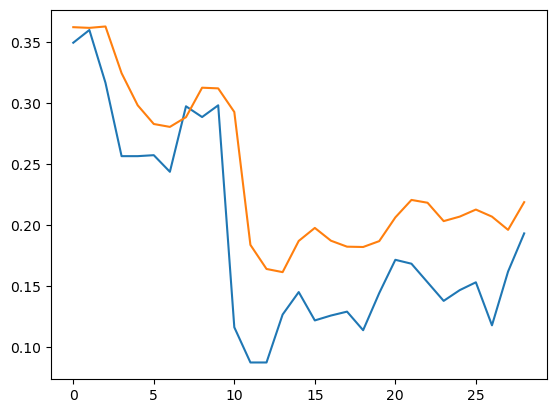

In [43]:
plt.plot(y_test)
plt.plot(predict)

In [44]:

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,predict)
print("Test_error",mae)

Test_error 0.05151794159389718


In [45]:
train_predict=model1.predict(x_train)
print("shape of train_predict",train_predict.shape)
print("shape of y_train",y_train.shape)

3/3 [==============================] - 0s 8ms/step
shape of train_predict (68, 1)
shape of y_train (68, 1)


In [46]:

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_train,train_predict)
print("Train_error",mae)

Train_error 0.02778670479871369


In [47]:
predict.shape,y_test.shape

((29, 1), (29, 1))

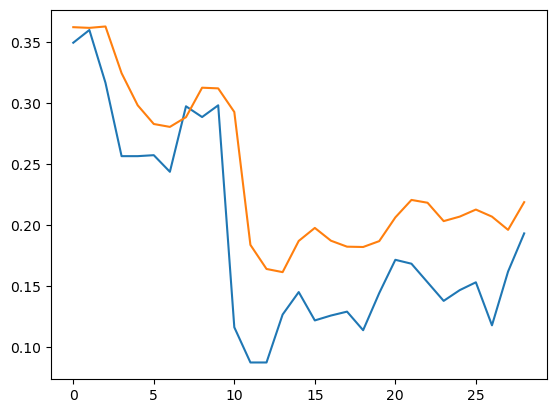

In [48]:
plt.plot(y_test[:,0])
plt.plot(predict[:,0])

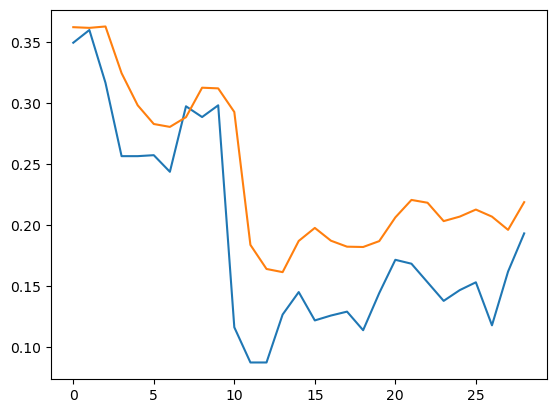

In [49]:
plt.plot(y_test.flatten())
plt.plot(predict.flatten())

In [52]:
'''data=predict.flatten()
#data = predict_flatten.tolist()  
print("length of data list",len(data))

# Flatten and convert actual values to a list
actual_data = y_test.flatten()
#actual_data = actual_flatten.tolist()
print("length of actual data after flatten and list",len(actual_data))

# Reshape the data to have 7 columnsa

reshaped_data = [data[i:i+7] for i in range(0, len(data), 7)]
print("shape of reshaped_data",len(reshaped_data))

# Create the plot
fig, ax = plt.subplots()
for i, row in enumerate(reshaped_data[:10]): 
    x= range(i*7, (i+1)*7)
    ax.plot(x, row)

reshaped_data2 = [actual_data[i:i+7] for i in range(0, len(actual_data), 7)]
print("shape of reshaped_data",len(reshaped_data2))

for j, col in enumerate(reshaped_data2[:10]): 
    y = range(j*7, (j+1)*7)
    ax.plot(y, col,linestyle='--', color='red')

# Plot each row of data (actual values)
#plt.plot(y_test[: :5])
# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Graph')
ax.legend()
plt.show()'''

'data=predict.flatten()\n#data = predict_flatten.tolist()  \nprint("length of data list",len(data))\n\n# Flatten and convert actual values to a list\nactual_data = y_test.flatten()\n#actual_data = actual_flatten.tolist()\nprint("length of actual data after flatten and list",len(actual_data))\n\n# Reshape the data to have 7 columnsa\n\nreshaped_data = [data[i:i+7] for i in range(0, len(data), 7)]\nprint("shape of reshaped_data",len(reshaped_data))\n\n# Create the plot\nfig, ax = plt.subplots()\nfor i, row in enumerate(reshaped_data[:10]): \n    x= range(i*7, (i+1)*7)\n    ax.plot(x, row)\n\nreshaped_data2 = [actual_data[i:i+7] for i in range(0, len(actual_data), 7)]\nprint("shape of reshaped_data",len(reshaped_data2))\n\nfor j, col in enumerate(reshaped_data2[:10]): \n    y = range(j*7, (j+1)*7)\n    ax.plot(y, col,linestyle=\'--\', color=\'red\')\n\n# Plot each row of data (actual values)\n#plt.plot(y_test[: :5])\n# Set labels and title\nax.set_xlabel(\'X-axis\')\nax.set_ylabel(\'Y-axi